# 8주차 타이타닉 프로젝트

---

지금까지 배운 각종 데이터 분석 기법을 사용하여 타이타닉 생존자를 예측해봅시다!

[데이터 다운로드](https://www.dropbox.com/s/r5f9aos8p9ri9sa/titanic_data.csv)

데이터에 대한 설명: https://www.kaggle.com/c/titanic

---

```
VARIABLE DESCRIPTIONS:
survival        Survival
                (0 = No; 1 = Yes)
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
name            Name
sex             Sex
age             Age
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)

SPECIAL NOTES:
Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.

Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
Parent:   Mother or Father of Passenger Aboard Titanic
Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations.
```

---

In [1]:
import pandas as pd
from pandas import Series, DataFrame

titanic_data = pd.read_csv("../data/titanic_data.csv")

In [4]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C


In [8]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


## 우리가 던져야 할 질문
1. 누가 타이타닉호에 타고 있었나 (성별, 나이, Class 등)
2. 어떤 deck에서 탔고, 그것이 class와 관련이 있는가
3. 승객들은 어디서 탔는가
4. 누가 혼자이고, 누가 가족이 있는가
5. **어떠한 요소가 생존에 영향을 미쳤는가**

### 1. 누가 타이타닉호에 타고 있었나 (성별, 나이, Class 등)

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

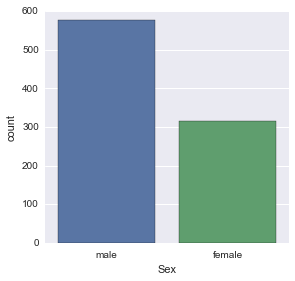

In [19]:
# 음 남자가 훨씬 많았네요
sns.factorplot('Sex', data=titanic_data, kind='count')

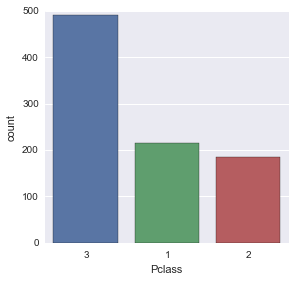

In [20]:
# 3등급 칸에 사람이 많군요
sns.factorplot('Pclass', data=titanic_data, kind='count')

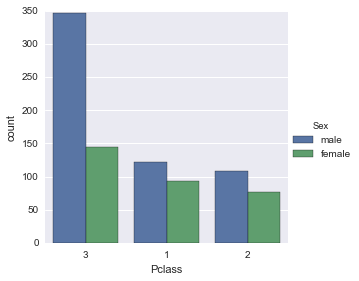

In [18]:
# 음.. 3등급 칸에는 남자가 확실히 많군요. 
sns.factorplot('Pclass', data=titanic_data, kind='count', hue='Sex')

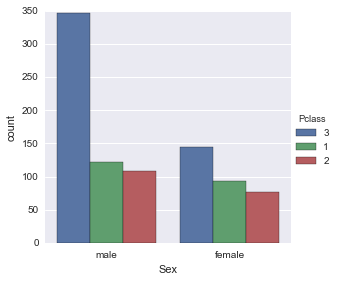

In [21]:
# 위에 그래프와 같으면서도 다른 느낌~
sns.factorplot('Sex', data=titanic_data, kind='count', hue='Pclass')

In [26]:
# 3,2,1 순서를 바꾸고 싶어요..
# 색깔 바꾸고 싶어요

In [29]:
# 음.. 혹시 아이들과 여자들이 많이 살진 않았을까?
def male_female_child(passenger):
    age, sex = passenger
    if age < 16:
        return 'child'
    else:
        return sex
    
titanic_data['person'] = titanic_data[['Age', 'Sex']].apply(male_female_child, axis=1)

In [40]:
titanic_data[:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C,child


음.. 그럼 아이들, 남자, 여자가 몇명씩 분류되었는지 `value_counts` 메소드를 사용해볼까요?

In [39]:
titanic_data['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

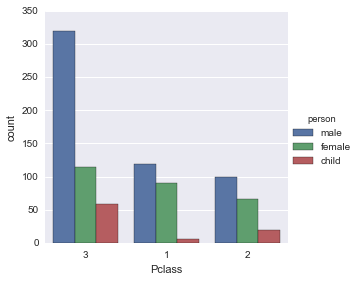

In [33]:
sns.factorplot('Pclass', data=titanic_data, kind='count', hue='person')

음 3등급칸에 아이들이 많군요.. 이번에는 타이타닉호의 나이대 분포를 한 번 볼까요?

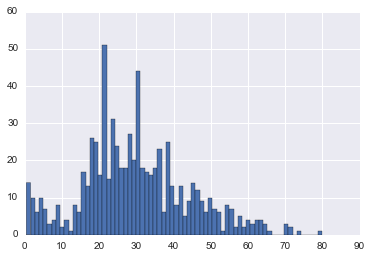

In [37]:
titanic_data['Age'].hist(bins=70)

음.. 20-30대가 확실히 많군요. 신생아도 많네요. 이번엔 histogram말고, kdeplot으로 그려봅시다.

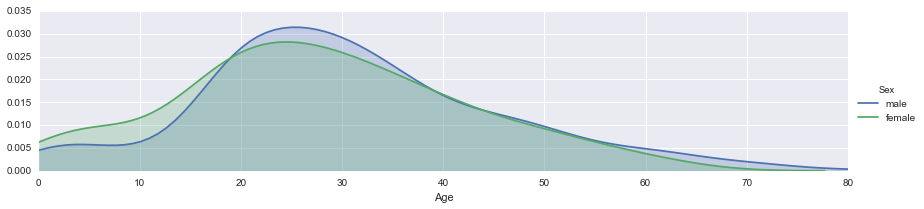

In [47]:
fig = sns.FacetGrid(titanic_data, hue='Sex', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)
oldest = titanic_data['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

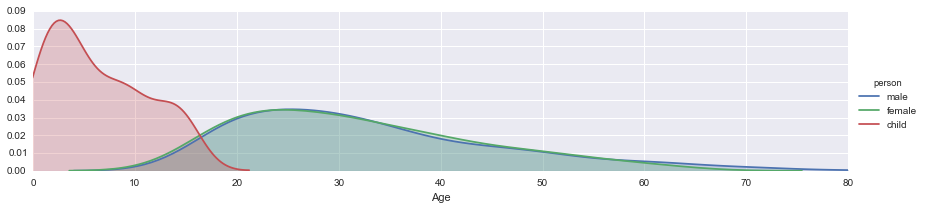

In [49]:
fig = sns.FacetGrid(titanic_data, hue='person', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)
oldest = titanic_data['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

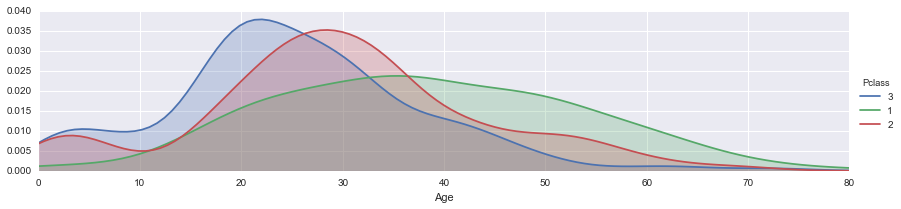

In [50]:
fig = sns.FacetGrid(titanic_data, hue='Pclass', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)
oldest = titanic_data['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

### 2. 승객들은 어떤 deck에서 탔고, 그것이 class와 관련이 있는가

In [52]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male


In [53]:
deck = titanic_data['Cabin'].dropna()

In [54]:
deck

1              C85
3             C123
6              E46
10              G6
11            C103
21             D56
23              A6
27     C23 C25 C27
31             B78
52             D33
54             B30
55             C52
61             B28
62             C83
66             F33
75           F G73
88     C23 C25 C27
92             E31
96              A5
97         D10 D12
102            D26
110           C110
118        B58 B60
123           E101
124            D26
128          F E69
136            D47
137           C123
139            B86
148             F2
          ...     
751           E121
759            B77
763        B96 B98
765            D11
772            E77
776            F38
779             B3
781            B20
782             D6
789        B82 B84
796            D17
802        B96 B98
806            A36
809             E8
815           B102
820            B69
823           E121
829            B28
835            E49
839            C47
849            C92
853         

In [61]:
levels = []

for level in deck:
    levels.append(level[0])
    
cabin_df = DataFrame(levels, columns=['Cabin'])
# cabin_df.columns = ['Cabin'] # 이렇게도 가능합니다.
cabin_df.head()

,Cabin
0,C
1,C
2,E
3,G
4,C


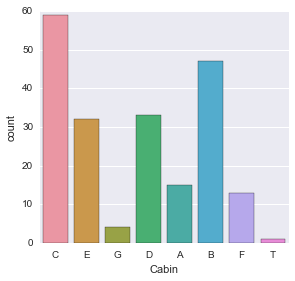

In [66]:
# TODO 순서 바꾸기
sns.factorplot('Cabin', data=cabin_df, kind='count')

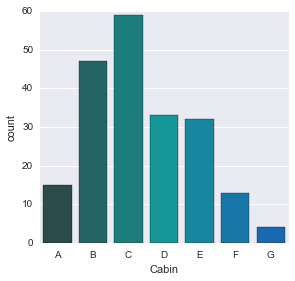

In [74]:
sns.factorplot('Cabin', data=cabin_df, kind='count', palette='winter_d', order=['A','B','C','D','E','F','G']) # T 생략

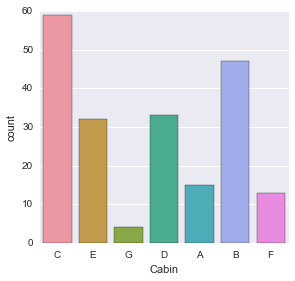

In [78]:
cabin_df = cabin_df[cabin_df.Cabin != 'T'] # 아예 데이터 내에서도 생략가능
sns.factorplot('Cabin', data=cabin_df, kind='count')

 http://matplotlib.org/users/colormaps.html

### 3. 승객들은 어디서 탔는가

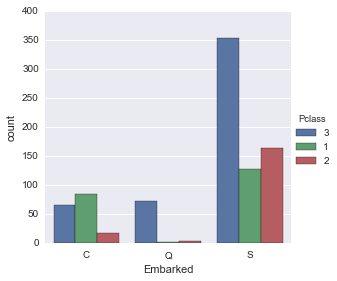

In [81]:
sns.factorplot('Embarked', data=titanic_data, hue='Pclass', kind='count', order=['C','Q','S'])

Southhampton의 경제적 지표가 될 수도 있겠네요..

여기서 문제, order=['C','Q','S']를 직접 치지 않고, 알아서 알파벳 순서로 되게 하려면?

그리고 C=>Cherbourg, Q=>Queenstown, S=>Southhanptom으로 그래프에 나오게 하려면?

### 4. 누가 혼자이고, 누가 가족이 있는가

In [112]:
titanic_data['Alone'] = titanic_data.Parch + titanic_data.SibSp
titanic_data['Alone']

0       1
1       1
2       0
3       1
4       0
5       0
6       0
7       4
8       2
9       1
10      2
11      0
12      0
13      6
14      0
15      0
16      5
17      0
18      1
19      0
20      0
21      0
22      0
23      0
24      4
25      6
26      0
27      5
28      0
29      0
       ..
861     1
862     0
863    10
864     0
865     0
866     1
867     0
868     0
869     2
870     0
871     2
872     0
873     0
874     1
875     0
876     0
877     0
878     0
879     1
880     1
881     0
882     0
883     0
884     0
885     5
886     0
887     0
888     3
889     0
890     0
Name: Alone, dtype: int64

In [113]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female,1
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,male,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S,child,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S,female,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C,child,1


'Alone' 컬럼을 추가하여 'With family', 'Alone'을 추가해봅시다. (아니면 그냥 저대로 두고, 그래프 표현할 떄만 이름 바꿔줘도 됨)

In [114]:
titanic_data[titanic_data['Alone']>0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S,male,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C,female,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S,female,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S,child,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S,female,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C,child,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,16.7000,G6,S,child,2
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.00,1,5,347082,31.2750,NaN,S,male,6
16,17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,NaN,Q,child,5
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.00,1,0,345763,18.0000,NaN,S,female,1


In [117]:
titanic_data['Alone'].loc[titanic_data['Alone']>0] = 'With Family'
titanic_data['Alone'].loc[titanic_data['Alone']==0] = 'Alone'

In [118]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male,Alone
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male,Alone
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,male,Alone
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S,child,With Family
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S,female,With Family
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C,child,With Family


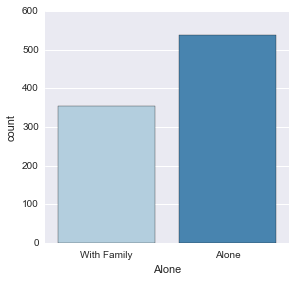

In [119]:
sns.factorplot('Alone', data=titanic_data, palette='Blues', kind='count')

### 5. 어떠한 요소가 생존에 영향을 미쳤는가

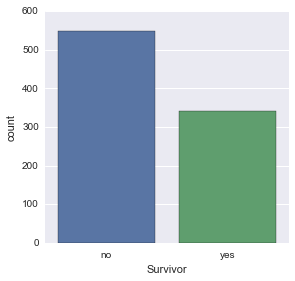

In [125]:
titanic_data['Survivor'] = titanic_data.Survived.map({0: "no", 1:"yes"})
sns.factorplot('Survivor', data=titanic_data, kind='count')

음, 확실히 생존자보다는 사망자가 많군요. Pclass와 생존여부 관계를 알아봅시다. 3등급 승객들이 더 많이 사망하였을까요? 아니면 1등급 승객들이 더 많이 사망하였을까요?

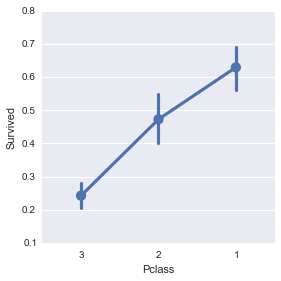

In [134]:
sns.factorplot('Pclass', 'Survived', data=titanic_data, order=[3,2,1])

음.. 확실히 3등급 승객들이 많이 사망하긴 했는데, 3등급 승객 중 남자가 많았던 것 기억하시나요? 혹시 그것때문에 그런 것은 아니었을까요?

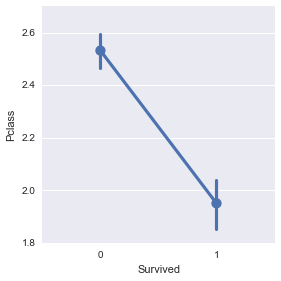

In [135]:
# 참고로 순서를 바꾸면 x,y가 이렇게 바뀌게 됩니다. 의미가 그닥 있어보이진 않네요 ㅎㅎ
sns.factorplot('Survived', 'Pclass', data=titanic_data)

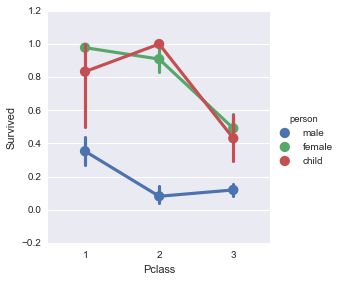

In [137]:
sns.factorplot('Pclass', 'Survived', hue='person', data=titanic_data, order=[1,2,3])

이렇게 보니, 객실 등급도 영향이 있긴 했지만, 남자, 여자, 아이들도 영향이 있었군요. 오히려 남자는 2등급 객실에서 더 많이 사망했네요.. 음..

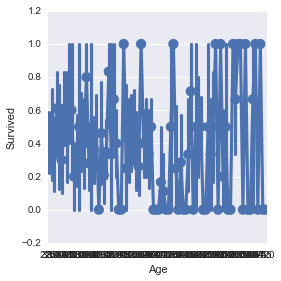

In [138]:
sns.factorplot('Age', 'Survived', data=titanic_data)

....................

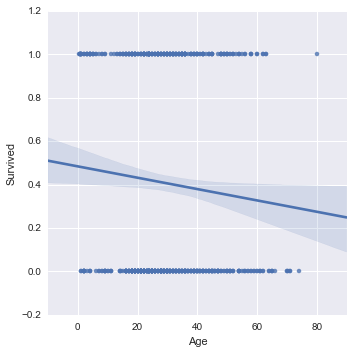

In [140]:
# linear plot!
sns.lmplot('Age','Survived',data=titanic_data)

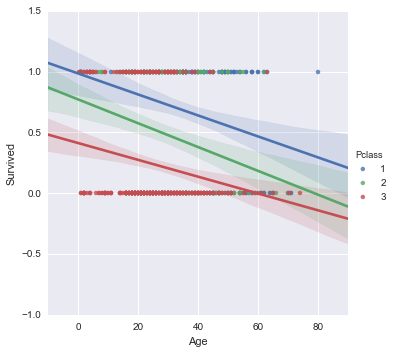

In [144]:
sns.lmplot('Age','Survived', hue='Pclass', data=titanic_data, hue_order=[1,2,3])

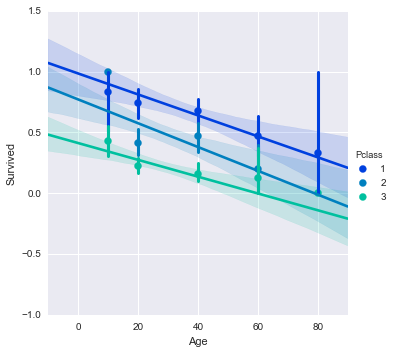

In [148]:
# grouping..
generations=[10,20,40,60,80]
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_data,palette='winter',x_bins=generations, hue_order=[1,2,3])

음?! 나이 많은 1등급 객실 사람들 생존 편차가 굉장히 크네요.. 혹시 나이 많은 여자와 남자?

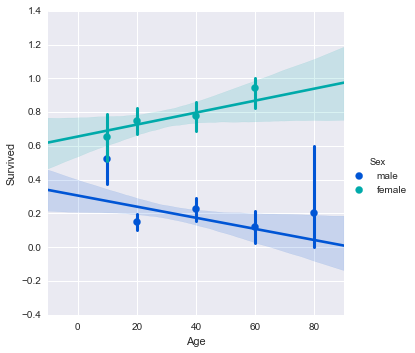

In [149]:
sns.lmplot('Age','Survived', hue='Sex', data=titanic_data, palette='winter', x_bins=generations)

아..그렇군요.. 앗 그런데 나이 많은 남자들이 생존 편차가 또 있네요.. 일단 나이 많은 남자분들만 등급별로 볼까요?

In [164]:
titanic_data[titanic_data['Age']>70][titanic_data['Sex']=="male"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,male,Alone,no
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q,male,Alone,no
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,male,Alone,no
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S,male,Alone,yes
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S,male,Alone,no


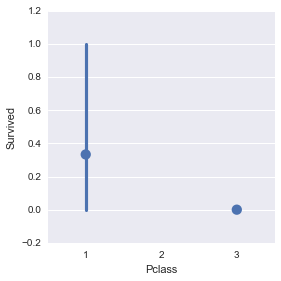

In [163]:
sns.factorplot('Pclass', 'Survived', data=titanic_data[titanic_data['Age']>70][titanic_data['Sex']=="male"], order=[1,2,3])

자, 지금부터는 스스로 몇가지 질문에 답해보는 시간을 가집시다.

1. deck이 어디였느냐에 따라서 생존율에 영향을 미쳤을까요?
2. family member가 있고 없냐에 따라 생존율이 달라졌을까요?

In [165]:
from IPython.display import Image
Image(url='http://i.imgur.com/DGNjT.gif')